In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


#Load the dataset

In [4]:
df = pd.read_csv("aq_kathmandu_us-diplomatic-post_embassy_kathmandu.csv")
df

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T18:15:00+00:00,2021-03-13T00:00:00+05:45,o3,0.057,ppm,27.738703,85.336205
1,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T18:15:00+00:00,2021-03-13T00:00:00+05:45,pm25,50.000,µg/m³,27.738703,85.336205
2,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T17:15:00+00:00,2021-03-12T23:00:00+05:45,pm25,46.000,µg/m³,27.738703,85.336205
3,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T17:15:00+00:00,2021-03-12T23:00:00+05:45,o3,0.051,ppm,27.738703,85.336205
4,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T16:15:00+00:00,2021-03-12T22:00:00+05:45,pm25,45.000,µg/m³,27.738703,85.336205
...,...,...,...,...,...,...,...,...,...,...,...
60774,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2017-03-03T01:15:00+00:00,2017-03-03T07:00:00+05:45,pm25,76.100,µg/m³,27.738703,85.336205
60775,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2017-03-03T00:15:00+00:00,2017-03-03T06:00:00+05:45,pm25,73.300,µg/m³,27.738703,85.336205
60776,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2017-03-03T00:15:00+00:00,2017-03-03T06:00:00+05:45,o3,0.004,ppm,27.738703,85.336205
60777,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2017-03-02T23:15:00+00:00,2017-03-03T05:00:00+05:45,o3,0.004,ppm,27.738703,85.336205


In [5]:
# Reload original dataset
df_original = pd.read_csv("aq_kathmandu_us-diplomatic-post_embassy_kathmandu.csv")

# Optional: strip column names for consistency
df_original.columns = df_original.columns.str.strip()

In [6]:
df.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T18:15:00+00:00,2021-03-13T00:00:00+05:45,o3,0.057,ppm,27.738703,85.336205
1,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T18:15:00+00:00,2021-03-13T00:00:00+05:45,pm25,50.000,µg/m³,27.738703,85.336205
2,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T17:15:00+00:00,2021-03-12T23:00:00+05:45,pm25,46.000,µg/m³,27.738703,85.336205
3,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T17:15:00+00:00,2021-03-12T23:00:00+05:45,o3,0.051,ppm,27.738703,85.336205
4,3459,US Diplomatic Post: Embassy Kathmandu,Kathmandu,NP,2021-03-12T16:15:00+00:00,2021-03-12T22:00:00+05:45,pm25,45.000,µg/m³,27.738703,85.336205


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60779 entries, 0 to 60778
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  60779 non-null  int64  
 1   location    60779 non-null  object 
 2   city        60779 non-null  object 
 3   country     60779 non-null  object 
 4   utc         60779 non-null  object 
 5   local       60779 non-null  object 
 6   parameter   60779 non-null  object 
 7   value       60779 non-null  float64
 8   unit        60779 non-null  object 
 9   latitude    60779 non-null  float64
 10  longitude   60779 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 5.1+ MB


#Data Cleaning

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df.columns

Index(['locationId', 'location', 'city', 'country', 'utc', 'local',
       'parameter', 'value', 'unit', 'latitude', 'longitude'],
      dtype='object')

In [10]:
#Dropping the unwanted columns
df=df.drop(columns=['locationId','location','country','utc','unit', 'latitude', 'longitude'])

In [11]:
df.columns

Index(['city', 'local', 'parameter', 'value'], dtype='object')

In [12]:
df.columns=df.columns.str.strip()
df

,city,local,parameter,value
0,Kathmandu,2021-03-13T00:00:00+05:45,o3,0.057
1,Kathmandu,2021-03-13T00:00:00+05:45,pm25,50.000
2,Kathmandu,2021-03-12T23:00:00+05:45,pm25,46.000
3,Kathmandu,2021-03-12T23:00:00+05:45,o3,0.051
4,Kathmandu,2021-03-12T22:00:00+05:45,pm25,45.000
...,...,...,...,...
60774,Kathmandu,2017-03-03T07:00:00+05:45,pm25,76.100
60775,Kathmandu,2017-03-03T06:00:00+05:45,pm25,73.300
60776,Kathmandu,2017-03-03T06:00:00+05:45,o3,0.004
60777,Kathmandu,2017-03-03T05:00:00+05:45,o3,0.004


In [13]:
#Checking missing values
df.isna().sum()

city         0
local        0
parameter    0
value        0
dtype: int64

In [14]:
#Checking the unique values in data
df.nunique()

city             1
local        32239
parameter        2
value          582
dtype: int64

In [15]:
#Removrs rows with missing value
df=df.dropna() 

In [16]:
#checking for duplicates
print(df.duplicated().sum())

#Drop duplicate rows
df=df.drop_duplicates()

0


There is no missing value and duplicate value in this dataset

In [17]:
#Handeling the outliers
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

In [18]:
print(f"Original size: {df_original.shape[0]}")
print(f"After cleaning: {df.shape[0]}")
print(f"Data retained: {df.shape[0] / df_original.shape[0] * 100:.2f}%")

Original size: 60779
After cleaning: 52886
Data retained: 87.01%


In [19]:
df

,city,local,parameter,value
0,Kathmandu,2021-03-13T00:00:00+05:45,o3,0.057
1,Kathmandu,2021-03-13T00:00:00+05:45,pm25,50.000
2,Kathmandu,2021-03-12T23:00:00+05:45,pm25,46.000
3,Kathmandu,2021-03-12T23:00:00+05:45,o3,0.051
4,Kathmandu,2021-03-12T22:00:00+05:45,pm25,45.000
...,...,...,...,...
60774,Kathmandu,2017-03-03T07:00:00+05:45,pm25,76.100
60775,Kathmandu,2017-03-03T06:00:00+05:45,pm25,73.300
60776,Kathmandu,2017-03-03T06:00:00+05:45,o3,0.004
60777,Kathmandu,2017-03-03T05:00:00+05:45,o3,0.004


In [20]:
df['parameter'].unique()

array(['o3', 'pm25'], dtype=object)

In [21]:
#Restructuring the dataset
df['local']=pd.to_datetime(df['local'],errors='coerce')
df.set_index('local',inplace=True)
df=df.sort_index()

In [22]:
#Scaling the data for LSTM
scaler=MinMaxScaler()
df['value']=scaler.fit_transform(df[['value']])

In [ ]:
import joblib

# Save the scaler
# joblib.dump(scaler, "scaler.save")

['scaler.save']

EDA

In [24]:
print(df.describe())

              value
count  52886.000000
mean       0.313221
std        0.223569
min        0.000000
25%        0.163250
50%        0.163630
75%        0.423913
max        1.000000


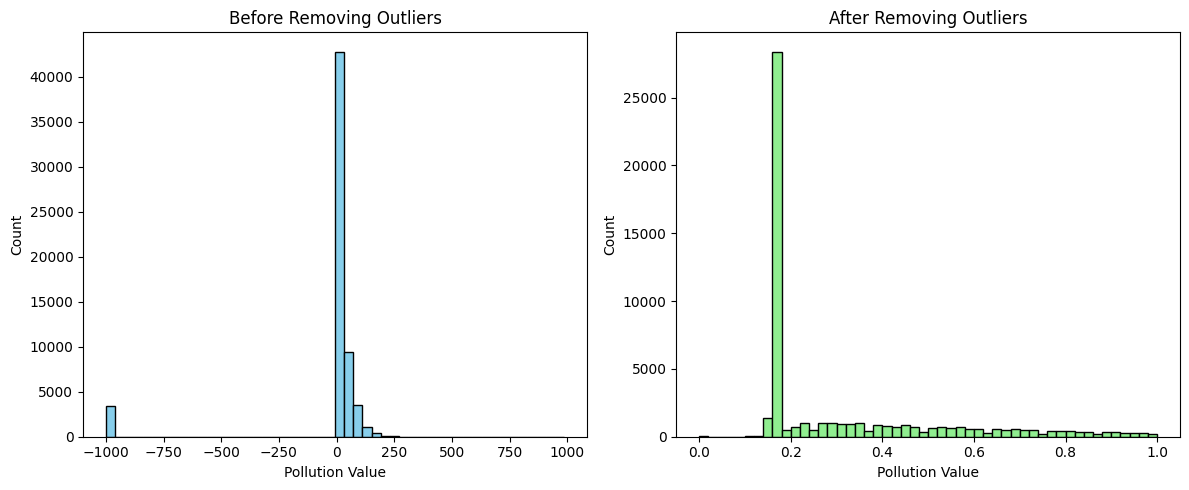

In [25]:
#Visualizing the Original Data and data after Data Cleaning Process  

# Step 1: Plot distribution before removing outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_original['value'], bins=50, color='skyblue', edgecolor='black')
plt.title('Before Removing Outliers')
plt.xlabel('Pollution Value')
plt.ylabel('Count')

# Step 2: Plot distribution after removing outliers
plt.subplot(1, 2, 2)
plt.hist(df['value'], bins=50, color='lightgreen', edgecolor='black')
plt.title('After Removing Outliers')
plt.xlabel('Pollution Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


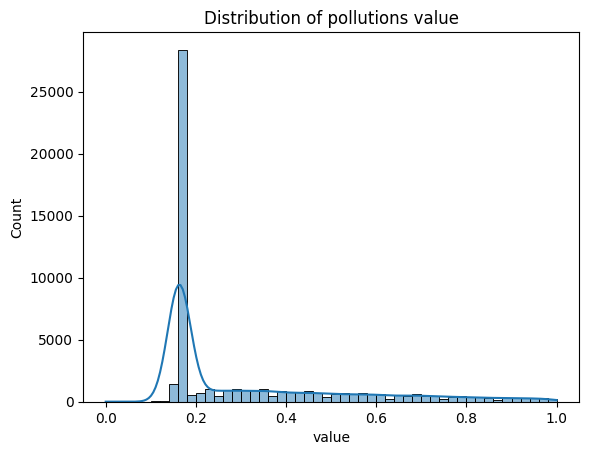

In [26]:
sns.histplot(df['value'],bins=50,kde=True)
plt.title('Distribution of pollutions value')
plt.show()

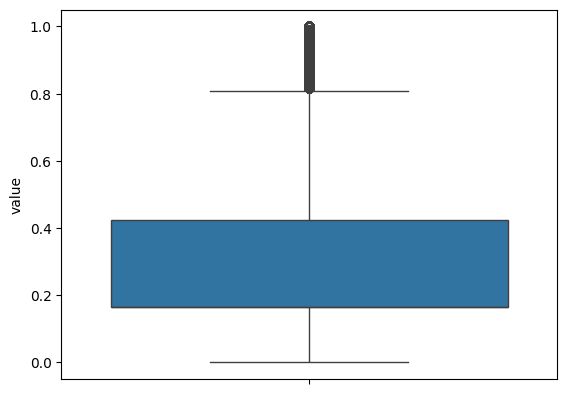

In [27]:
#Box plot
sns.boxplot(y='value',data=df.reset_index())
plt.show()

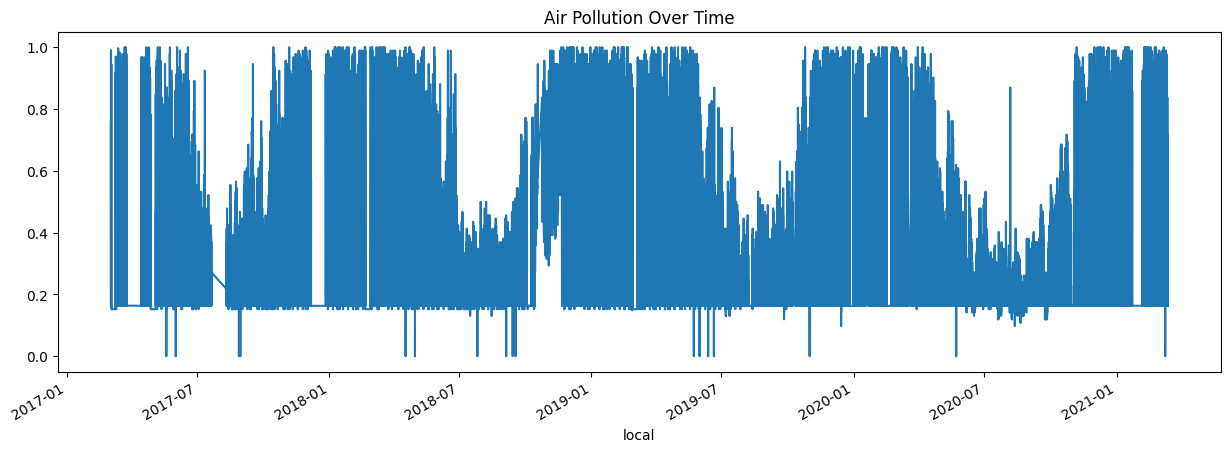

In [28]:
#Time Series plot
df['value'].plot(figsize=(15,5))
plt.title('Air Pollution Over Time')
plt.show()

fig=px.line(df,x=df.index,y='value')
fig.show()

In [29]:
#preparing data for LSTM
def create_sequences(data, seq_length):
    X,y=[],[]
    for i in range(len(data)- seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X),np.array(y)

seq_length=60
X,y=create_sequences(df['value'],seq_length)
X=X.reshape((X.shape[0],X.shape[1],1))


In [30]:
#Split into train and test
split=int(len(X)*0.8)
X_train,X_test= X[:split],X[split:]
y_train,y_test= y[:split],y[split:]

In [31]:
#Build the LSTM Model
model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(seq_length,1)))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 0.0503 - val_loss: 0.0351
Epoch 2/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - loss: 0.0445 - val_loss: 0.0345
Epoch 3/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - loss: 0.0424 - val_loss: 0.0329
Epoch 4/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - loss: 0.0406 - val_loss: 0.0320
Epoch 5/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - loss: 0.0390 - val_loss: 0.0307
Epoch 6/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - loss: 0.0373 - val_loss: 0.0297
Epoch 7/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - loss: 0.0370 - val_loss: 0.0294
Epoch 8/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - loss: 0.0363 - val_loss: 0.0293
Epoch 9/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - loss: 0.0357 - val_loss: 0.0291
Epoch 10/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - loss: 0.0352 - val_loss: 0.0292
Epoch 11/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - loss: 0.0355 - val_loss: 0.0290
Epoch 12

In [32]:
#Make Prediction
y_pred=model.predict(X_test)

331/331 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


In [33]:
#Inverse Transform
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

In [34]:
#Evaluation
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
R2=r2_score(y_test_inv,y_pred_inv)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2-Score: {R2:.2f}")

MAE: 9.78, RMSE: 15.38, R2-Score: 0.34


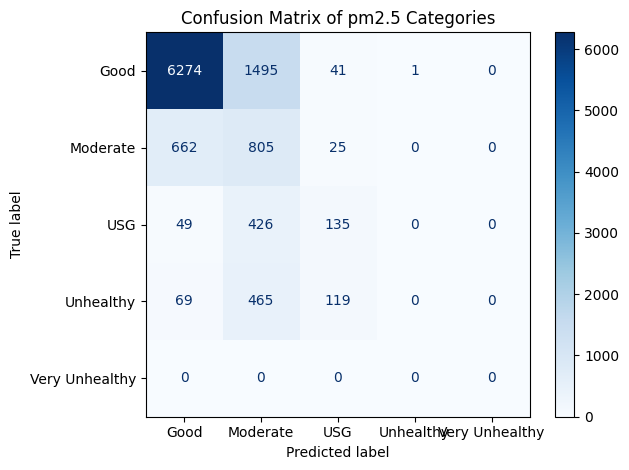

In [35]:
def categorized_pm25(value):
    if value<12:
        return 'Good'
    elif value<=35.4:
        return 'Moderate'
    elif value<=55.4:
        return 'USG'
    elif value<=150.4:
        return 'Unhealthy'
    else:
        return 'Very Unhealthy'
    
actual_classes=pd.Series(y_test_inv.flatten()).apply(categorized_pm25)
predicted_classes=pd.Series(y_pred_inv.flatten()).apply(categorized_pm25)

#Confusion matrix
cm=confusion_matrix(actual_classes,predicted_classes,labels=['Good','Moderate','USG','Unhealthy','Very Unhealthy'])
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Good','Moderate','USG','Unhealthy','Very Unhealthy'])

disp.plot(cmap='Blues')
plt.title('Confusion Matrix of pm2.5 Categories')
plt.tight_layout()
plt.show()

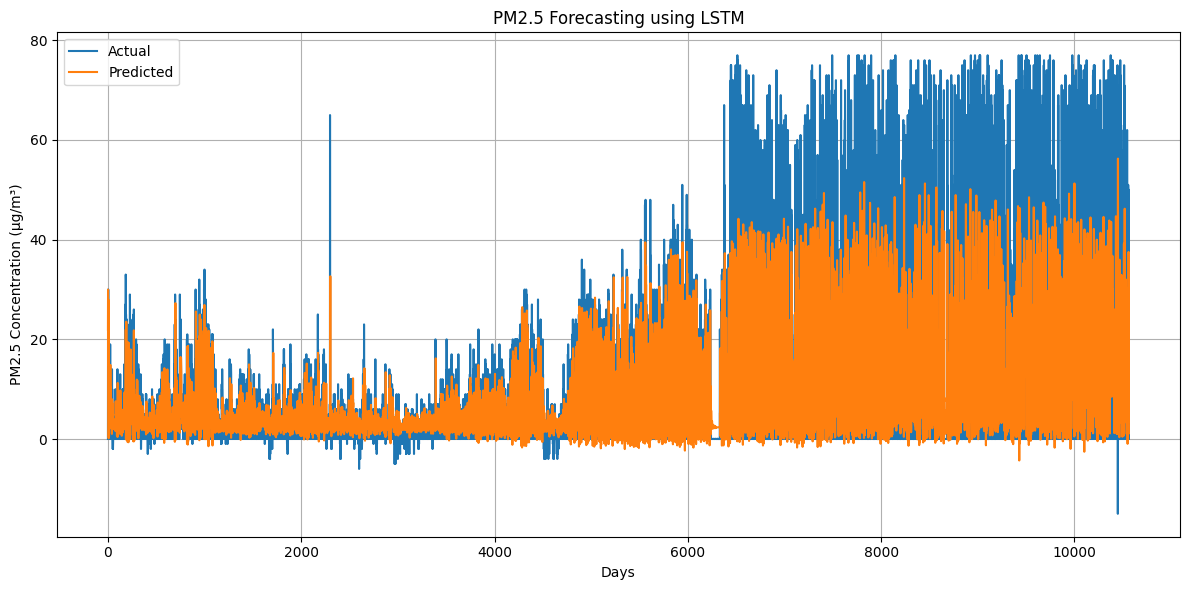

In [36]:
#Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('PM2.5 Forecasting using LSTM')
plt.xlabel('Days')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
#Displaying the Predicted pm25
pred_df = pd.DataFrame({
    'Actual_PM25': y_test_inv.flatten(),
    'Predicted_PM25': y_pred_inv.flatten()
})


print(pred_df)

#Save to CSV if needed
#pred_df.to_csv("predicted_pm25_output.csv", index=False)


       Actual_PM25  Predicted_PM25
0            0.027       21.930349
1           27.000       29.989342
2            0.028       16.620312
3           30.000       22.616947
4            0.026       14.838288
...            ...             ...
10561       45.000       37.541550
10562        0.051       20.684238
10563       46.000       30.411325
10564       50.000       17.785173
10565        0.057        1.165944

[10566 rows x 2 columns]


In [38]:
# Save the trained model
#model.save("lstm_model.h5")
